In [2]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# 让画图内置
%matplotlib inline
# 设置画布大小
plt.rcParams["figure.figsize"] = (10, 6)


# 忽略版本号之类的warnings
import warnings
warnings.filterwarnings('ignore')
import os
from datetime import date

# 数据导入

In [2]:
# 导入数据
# original_data = pd.read_csv('data\processed_data.csv')
# data = original_data.copy()
# data.shape

In [3]:
# 导入数据
data = pd.read_csv('data\processed_data.csv')
data.shape

(42413557, 11)

In [4]:
data['event_time'] = pd.to_datetime(data['event_time'])
data['category_code'] = data['category_code'].astype('category')
data['brand'] = data['brand'].astype('category')

data['event_day'] = data['event_time'].dt.date
data['event_hour'] = data['event_time'].dt.hour

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42413557 entries, 0 to 42413556
Data columns (total 13 columns):
 #   Column         Dtype         
---  ------         -----         
 0   event_time     datetime64[ns]
 1   event_type     object        
 2   product_id     int64         
 3   category_id    int64         
 4   category_code  category      
 5   brand          category      
 6   price          float64       
 7   user_id        int64         
 8   category       object        
 9   sub_category   object        
 10  product_name   object        
 11  event_day      object        
 12  event_hour     int32         
dtypes: category(2), datetime64[ns](1), float64(1), int32(1), int64(3), object(5)
memory usage: 3.4+ GB


In [6]:
data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,category,sub_category,product_name,event_day,event_hour
0,2019-10-01 00:00:00,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,NaN,NaN,NaN,2019-10-01,0
1,2019-10-01 00:00:00,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,appliances,environment,water_heater,2019-10-01,0
2,2019-10-01 00:00:01,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,furniture,living_room,sofa,2019-10-01,0
3,2019-10-01 00:00:01,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,computers,notebook,notebook,2019-10-01,0
4,2019-10-01 00:00:04,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,electronics,smartphone,smartphone,2019-10-01,0


# 平台经营
- pv uv gmv 下单数

## PV UV   
- view_info

In [5]:
view_info  = data.query('event_type == "view"')
puv = view_info.groupby('event_type').agg(PV = ('user_id','count'),
              UV = ('user_id','nunique'))
# puv['puv'] = puv['pv'] / puv['uv']
puv

,PV,UV
event_type,,
view,40772341,3022130


### 分日

In [11]:
view_info_byday = view_info.groupby(['event_day']).agg(PV = ('user_id','count'),
              UV = ('user_id','nunique'))
view_info_byday['puv'] = round(view_info_byday['PV']/view_info_byday['UV'],2)
view_info_byday

,PV,UV,puv
event_day,,,
2019-10-01,1208165,190158,6.35
2019-10-02,1154436,184955,6.24
2019-10-03,1088577,170655,6.38
2019-10-04,1346162,209393,6.43
2019-10-05,1271176,194949,6.52
2019-10-06,1263876,193194,6.54
2019-10-07,1160929,186939,6.21
2019-10-08,1328893,221194,6.01
2019-10-09,1306089,214133,6.10


In [13]:
pd.options.display.float_format = '{:.2f}'.format

view_info_byday.describe()


,PV,UV,puv
count,31.00,31.00,31.00
mean,1315236.81,208810.32,6.30
std,111084.61,16233.32,0.25
min,1088577.00,170655.00,5.96
25%,1232293.00,195246.50,6.11
50%,1328893.00,208456.00,6.25
75%,1383097.00,223301.00,6.40
max,1584488.00,231826.00,7.01


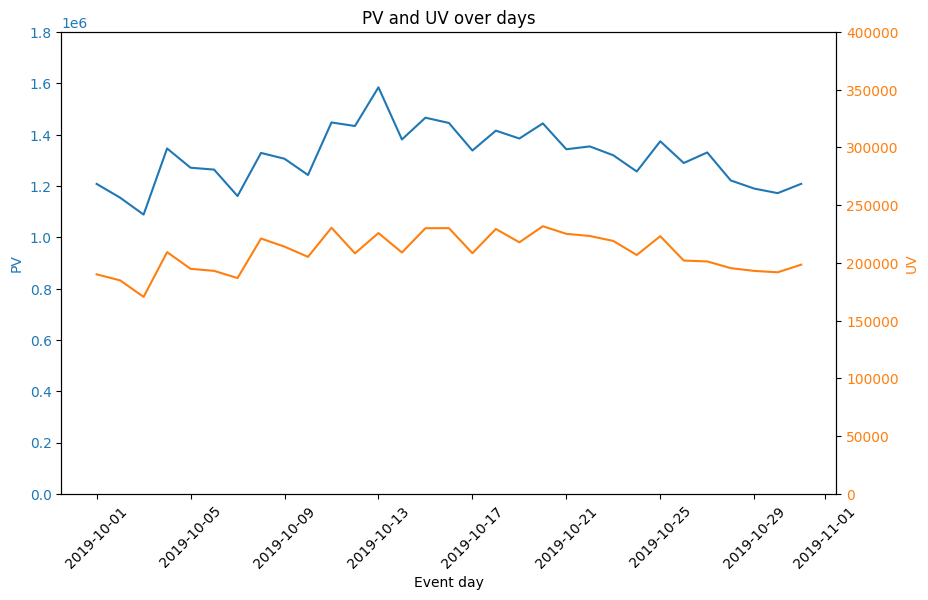

In [33]:
# 创建一个双轴折线图
fig, ax1 = plt.subplots()

# 绘制 PV 数据
ax1.set_xlabel('Event day')
ax1.set_ylabel('PV', color='tab:blue')
ax1.plot(view_info_byday.index, view_info_byday['PV'], color='tab:blue', label='PV')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.tick_params(axis='x', rotation=45)
ax1.set_ylim(0, 1800000) 


# 创建第二个 y 轴
ax2 = ax1.twinx()
ax2.set_ylabel('UV', color='tab:orange')
ax2.plot(view_info_byday.index, view_info_byday['UV'], color='tab:orange', label='UV')
ax2.tick_params(axis='y', labelcolor='tab:orange')
ax2.set_ylim(0, 400000) 

# 添加标题和图例
plt.title('PV and UV over days')
# fig.tight_layout()  # 自动调整布局
plt.show()

### 分时

In [14]:
view_info_by_hour = view_info.groupby(['event_hour']).agg(PV = ('user_id','count'),
              UV = ('user_id','nunique'))
view_info_by_hour

,PV,UV
event_hour,,
0,299740,59584
1,545513,116376
2,1036894,209100
3,1485498,290737
4,1826073,351996
5,2020202,387131
6,2154159,413004
7,2217399,426678
8,2267568,432146


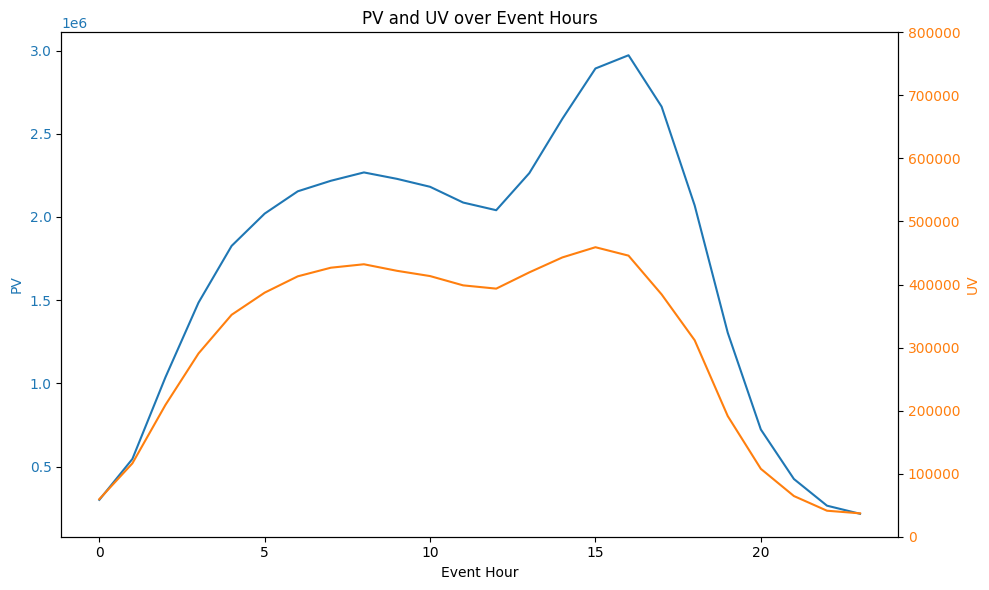

In [35]:
# 创建一个双轴折线图
fig, ax1 = plt.subplots()

# 绘制 PV 数据
ax1.set_xlabel('Event Hour')
ax1.set_ylabel('PV', color='tab:blue')
ax1.plot(view_info_by_hour.index, view_info_by_hour['PV'], color='tab:blue', label='PV')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# 创建第二个 y 轴
ax2 = ax1.twinx()
ax2.set_ylabel('UV', color='tab:orange')
ax2.plot(view_info_by_hour.index, view_info_by_hour['UV'], color='tab:orange', label='UV')
ax2.tick_params(axis='y', labelcolor='tab:orange')
ax2.set_ylim(0, 800000) 

# 添加标题和图例
plt.title('PV and UV over Event Hours')
fig.tight_layout()  # 自动调整布局
plt.show()

## 下单数 gmv 客单价
- order_info

In [19]:
# 订单数 gmv
order_info  = data.query('event_type == "purchase"')
order_info.groupby('event_type').agg(order_num = ('user_id','count'),
                                    gmv = ('price','sum'),
                                    ATV = ('price','mean'))

,order_num,gmv,ATV
event_type,,,
purchase,742773,229933212.63,309.56


### 分日

In [20]:
order_info_byday= order_info.groupby('event_day').agg(order_num = ('user_id','count'),
                                    gmv = ('price','sum'))
order_info_byday

,order_num,gmv
event_day,,
2019-10-01,19305,6275579.06
2019-10-02,19469,6213628.53
2019-10-03,19255,6233782.98
2019-10-04,27039,8623058.19
2019-10-05,23492,7341094.46
2019-10-06,22169,6737258.17
2019-10-07,21378,6348189.06
2019-10-08,23071,6819701.26
2019-10-09,22747,6855326.05


In [21]:
order_info_byday.describe()

,order_num,gmv
count,31.00,31.00
mean,23960.42,7417200.41
std,3083.45,957899.74
min,19255.00,6213628.53
25%,21685.00,6649647.68
50%,23883.00,7307691.57
75%,25616.00,7887907.54
max,31393.00,9747164.72


In [27]:
(957899.74 )/7417200.41

0.12914572710055708

In [24]:
(3083.45 )/23960.42

0.12868931345944687

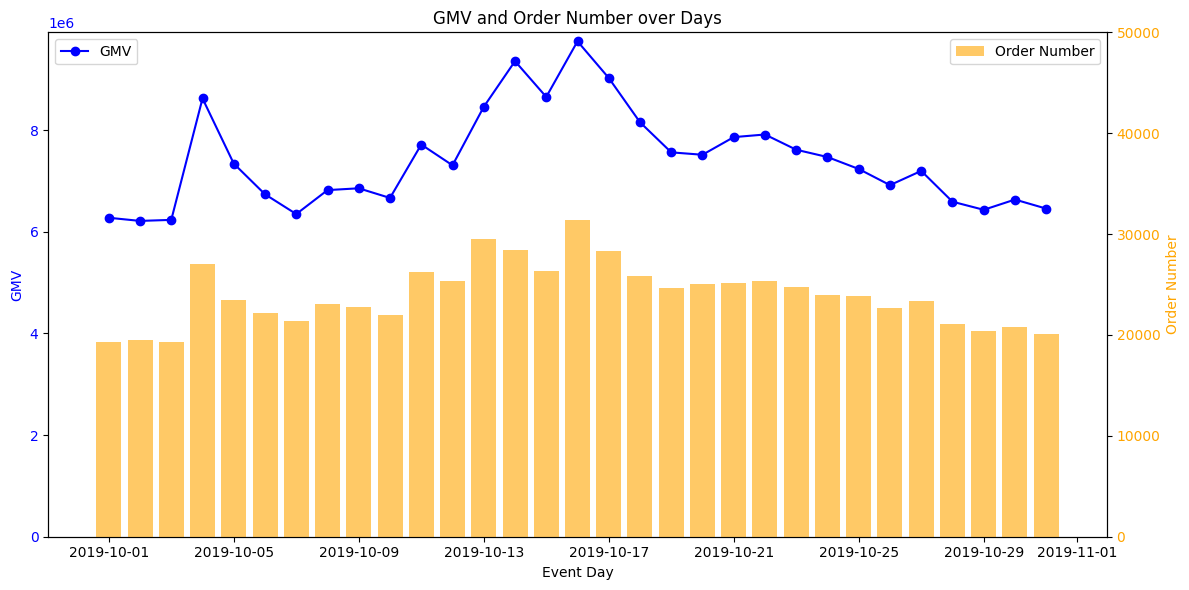

In [39]:
# 创建一个双轴图
fig, ax1 = plt.subplots(figsize=(12, 6))

# 绘制 GMV 的折线图
ax1.plot(order_info_byday.index, order_info_byday['gmv'], color='blue', marker='o', label='GMV')
ax1.set_ylabel('GMV', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_ylim(bottom=0)

# 创建第二个 y 轴
ax2 = ax1.twinx()

# 绘制订单数量的柱状图
ax2.bar(order_info_byday.index, order_info_byday['order_num'], color='orange', alpha=0.6, label='Order Number')
ax2.set_ylabel('Order Number', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
ax2.set_ylim(top=50000)

# 添加标题和 x 轴标签
plt.title('GMV and Order Number over Days')
ax1.set_xlabel('Event Day')

# 显示图例
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 自动调整布局
fig.tight_layout()
plt.show()

### 分时

In [43]:
order_info_byhour= order_info.groupby('event_hour').agg(order_num = ('user_id','count'),
                                    gmv = ('price','sum'))
order_info_byhour

,order_num,gmv
event_hour,,
0,2949,980317.85
1,5526,1577532.87
2,13968,3873027.44
3,29632,8696837.45
4,41143,12064072.73
5,48068,14398553.24
6,52002,15808753.76
7,53404,16338607.12
8,55195,17058580.92


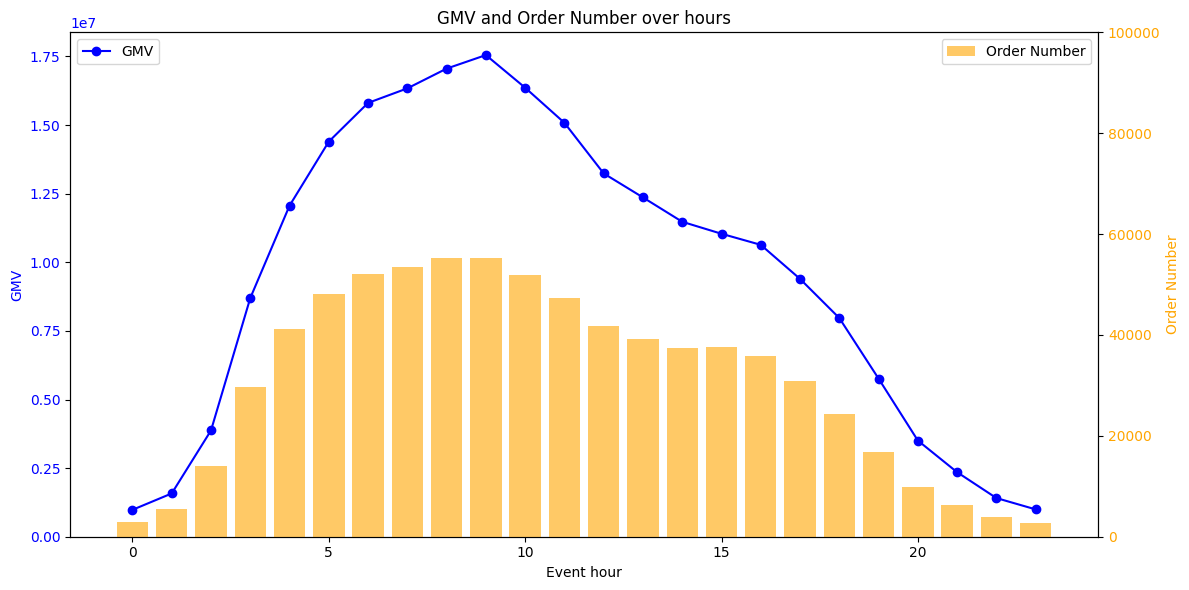

In [46]:
# 创建一个双轴图
fig, ax1 = plt.subplots(figsize=(12, 6))

# 绘制 GMV 的折线图
ax1.plot(order_info_byhour.index, order_info_byhour['gmv'], color='blue', marker='o', label='GMV')
ax1.set_ylabel('GMV', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_ylim(bottom=0)

# 创建第二个 y 轴
ax2 = ax1.twinx()

# 绘制订单数量的柱状图
ax2.bar(order_info_byhour.index, order_info_byhour['order_num'], color='orange', alpha=0.6, label='Order Number')
ax2.set_ylabel('Order Number', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
ax2.set_ylim(top=100000)

# 添加标题和 x 轴标签
plt.title('GMV and Order Number over hours')
ax1.set_xlabel('Event hour')


# 显示图例
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 自动调整布局
fig.tight_layout()
plt.show()